In [157]:
import numpy as np

In [158]:
def split_covid_data(arr_path, normalize=True):
    covid_data = np.load(arr_path)
    covid_data = covid_data.astype(np.float32)
    
    if normalize: 
        data_mean = np.mean(covid_data, axis=1, keepdims=True)
        data_std = np.std(covid_data, axis=1, keepdims=True)
        covid_data = (covid_data - data_mean) / data_std
        stats_train = (data_mean[:709,:], data_std[:709,:])
        stats_val = (data_mean[709:798, :], data_std[709:798, :])
        stats_test = (data_mean[798:, :], data_std[798:,:])
        stats = (stats_train, stats_val, stats_test)
    else: 
        stats = None
    
    train_data = covid_data[:709,:]
    val_data = covid_data[709:798,:]
    test_data = covid_data[798:, :]

    # reshaping arrays:
    train_data = np.reshape(train_data, newshape=(train_data.shape[0], train_data.shape[1], 1))
    val_data = np.reshape(val_data, newshape=(val_data.shape[0], val_data.shape[1], 1))
    test_data = np.reshape(test_data, newshape=(test_data.shape[0], test_data.shape[1], 1))

    return train_data, val_data, test_data, stats

In [159]:
def rescale_covid_data(data_sample, stats, index):
    data_mean, data_std = stats
    mean, std = data_mean[index], data_std[index]
    data_sample = std * data_sample + mean
    data_sample = data_sample.astype(np.int32)
    return data_sample

In [160]:
covid_path = '../../data/covid_preprocess.npy'
train_data, val_data, test_data, stats = split_covid_data(covid_path)
stats_train, stats_val, stats_test = stats
train_data_unnorm, val_data_unnorm, test_data_unnorm, _ = split_covid_data(covid_path, normalize=False)

In [161]:
#print(test_data[10])
print(list(test_data_unnorm[80].reshape(61)))

[0.0, 38.0, 36.0, 39.0, 31.0, 45.0, 87.0, 109.0, 159.0, 298.0, 468.0, 565.0, 675.0, 623.0, 427.0, 338.0, 309.0, 116.0, 152.0, 73.0, 0.0, 4.0, 40.0, 0.0, 0.0, 0.0, 0.0, 574.0, 1059.0, 401.0, 48.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [162]:
sum_test_data = np.sum(test_data_unnorm, axis=1)
print(np.max(sum_test_data))
print(np.argmax(sum_test_data))

20504.0
33


In [163]:
sum_test_data.dtype

dtype('float32')

In [164]:
test_data_unnorm[33]

array([[ 74.],
       [ 75.],
       [ 87.],
       [ 87.],
       [101.],
       [109.],
       [109.],
       [136.],
       [141.],
       [144.],
       [150.],
       [150.],
       [175.],
       [186.],
       [200.],
       [208.],
       [222.],
       [230.],
       [244.],
       [258.],
       [277.],
       [284.],
       [292.],
       [292.],
       [296.],
       [303.],
       [312.],
       [331.],
       [331.],
       [346.],
       [346.],
       [360.],
       [373.],
       [385.],
       [393.],
       [400.],
       [408.],
       [416.],
       [429.],
       [438.],
       [447.],
       [452.],
       [457.],
       [459.],
       [463.],
       [469.],
       [474.],
       [480.],
       [487.],
       [491.],
       [500.],
       [506.],
       [513.],
       [518.],
       [519.],
       [521.],
       [526.],
       [527.],
       [528.],
       [534.],
       [535.]], dtype=float32)

In [165]:
mean_preds_path = '../../output/covid_SMC_T/covid_Recurrent_T_depth_8_bs_32_fullmodel_True_dff_16_attn_w_None__p_10_SigmaObs_0.5_sigmas_0.5/mean_preds_sample_33.npy'

distrib_path = '../../output/covid_SMC_T/covid_Recurrent_T_depth_8_bs_32_fullmodel_True_dff_16_attn_w_None__p_10_SigmaObs_0.5_sigmas_0.5/distrib_future_timesteps_sample_33.npy'




In [166]:
mean_preds = np.load(mean_preds_path)
distrib_20_timsteps = np.load(distrib_path)

In [167]:
mean_preds_rescaled = rescale_covid_data(mean_preds, stats=stats_test, index=33)
mean_preds_rescaled.shape

(60,)

In [168]:
print(list(mean_preds_rescaled))

[112, 116, 118, 127, 127, 145, 143, 159, 163, 170, 174, 179, 192, 197, 221, 220, 234, 252, 262, 285, 294, 304, 311, 310, 315, 327, 319, 338, 342, 361, 357, 372, 382, 389, 402, 397, 405, 418, 424, 435, 396, 398, 400, 400, 401, 407, 409, 414, 416, 417, 425, 428, 431, 433, 430, 433, 440, 442, 444, 444]


In [169]:
true_labels = test_data_unnorm[10, 1:].reshape(60)
print(true_labels.shape)

(60,)


In [170]:
import matplotlib.pyplot as plt

In [171]:
x = np.linspace(1,60,60)

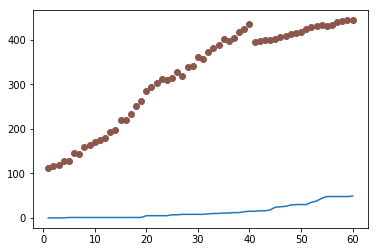

In [172]:
fig, ax = plt.subplots()
ax.plot(x, true_labels, '-')
ax.plot(x, mean_preds_rescaled, 'o', color='tab:brown')

### confidence intervals computation

In [173]:
distrib_20_timsteps.shape
distrib_20_timsteps[:,0]

array([0.5034129 , 0.68266261, 0.22075613, 0.51112068, 0.7108013 ,
       0.50359589, 0.29989633, 0.52761734, 0.39138076, 0.52357298,
       0.56684738, 0.61483252, 0.75766695, 1.13802743, 0.78622848,
       0.28651083, 0.66712499, 0.74377465, 0.82460272, 0.39573628])

In [174]:
distrib_rescaled = rescale_covid_data(distrib_20_timsteps, stats=stats_test, index=33)
distrib_rescaled[:,0]

array([410, 437, 368, 411, 441, 410, 380, 414, 393, 413, 419, 427, 448,
       504, 452, 378, 434, 446, 458, 394], dtype=int32)

In [175]:
distrib_mean = np.mean(distrib_rescaled, axis=1)
print(distrib_mean.shape)
distrib_mean[0]

(20,)


396.046

In [176]:
distrib_std = np.std(distrib_rescaled, axis=1)
distrib_std[0]

26.125311175180286

In [177]:
pad_distrib_mean = np.zeros(shape=60)
pad_distrib_mean[40:] = distrib_mean
pad_distrib_std = np.zeros(shape=60)
pad_distrib_std[40:] = distrib_std

In [178]:
pad_distrib_mean

array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   , 396.046, 399.776,
       400.997, 400.793, 401.593, 407.02 , 408.861, 414.832, 415.787,
       418.46 , 423.118, 428.122, 432.805, 433.561, 429.768, 432.409,
       441.092, 441.142, 446.233, 444.67 ])

In [179]:
pad_distrib_std

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       26.12531118, 24.68881982, 24.58932677, 25.38468339, 25.86625893,
       26.75039439, 26.29569697, 26.42142646, 24.26919098, 27.3987299 ,
       26.93637088, 26.12054969, 28.41237362, 28.3769674 , 28.23328135,
       27.01380608, 30.39670272, 28.01638513, 28.48446438, 30.26858272])

In [180]:
distrib_rescaled.shape[1]**(1/2)

31.622776601683793

In [181]:
lower_bound = pad_distrib_mean - 1.960 * pad_distrib_std / (distrib_rescaled.shape[1]**(1/2))
upper_bound = pad_distrib_mean + 1.960 * pad_distrib_std / (distrib_rescaled.shape[1]**(1/2))

In [182]:
#lower_bound = pad_distrib_mean - 1.960 * pad_distrib_std
#upper_bound = pad_distrib_mean + 1.960 * pad_distrib_std

In [183]:
lower_bound.shape

(60,)

In [184]:
lower_bound

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       394.42673644, 398.24577109, 399.47293774, 399.21964102,
       399.98979266, 405.36199338, 407.23117582, 413.19438302,
       414.28277996, 416.76180913, 421.44846644, 426.50303156,
       431.04398284, 431.80217734, 428.01808309, 430.73466695,
       439.20799285, 439.40552646, 444.46751461, 442.79393381])

In [185]:
upper_bound

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       397.66526356, 401.30622891, 402.52106226, 402.36635898,
       403.19620734, 408.67800662, 410.49082418, 416.46961698,
       417.29122004, 420.15819087, 424.78753356, 429.74096844,
       434.56601716, 435.31982266, 431.51791691, 434.08333305,
       442.97600715, 442.87847354, 447.99848539, 446.54606619])

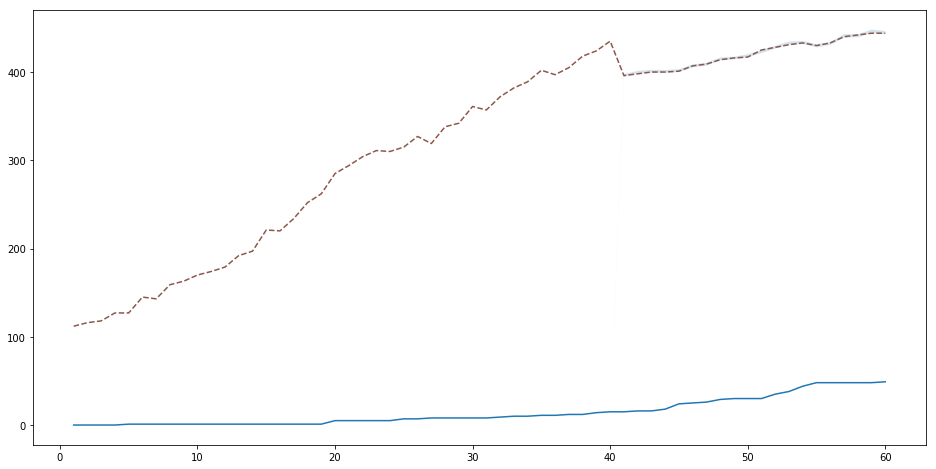

In [186]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, true_labels, '-')
ax.plot(x, mean_preds_rescaled, '-', linestyle='dashed', color='tab:brown')
ax.fill_between(x, lower_bound, upper_bound, alpha=0.2)